In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#import libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as num
import matplotlib.pyplot as plot



#Reading CSV file using panda

#Info about the data shape of data, type of individual columns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/soccer - Sheet1.csv")
data.head() 

,Game ID,Venue,Opponent,GF,GA,xG,xGA,Poss,Result
0,1.0,Home,Real Sociedad,4,2,2.7,0.8,63,W
1,2.0,Away,Athletic Club,1,1,1.0,1.6,67,D
2,3.0,Home,Getafe,2,1,1.5,0.4,67,W
3,4.0,Home,Granada,1,1,1.1,0.6,77,D
4,5.0,Away,Cádiz,0,0,0.7,1.6,67,D


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Game ID   740 non-null    float64
 1   Venue     1291 non-null   object 
 2   Opponent  1291 non-null   object 
 3   GF        1291 non-null   int64  
 4   GA        1291 non-null   int64  
 5   xG        1291 non-null   float64
 6   xGA       1291 non-null   float64
 7   Poss      1291 non-null   int64  
 8   Result    1291 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 90.9+ KB


In [ ]:
data.shape

(1291, 9)

Selecting Feature selection

In [ ]:
data.columns

Index(['Game ID', 'Venue', 'Opponent', 'GF', 'GA', 'xG', 'xGA', 'Poss',
       'Result'],
      dtype='object')

In [ ]:
data = data[['Venue', 'Opponent','GF', 'GA', 'xG','xGA', 'Poss', 'Result']]

In [ ]:
data['Result'].value_counts()

W    827
D    259
L    205
Name: Result, dtype: int64

In [ ]:
data['Result'].values

array(['W', 'D', 'W', ..., 'W', 'W', 'D'], dtype=object)

In [ ]:
# Check if there is any null value
data.isna().apply(pd.value_counts)

,Venue,Opponent,GF,GA,xG,xGA,Poss,Result
False,1291,1291,1291,1291,1291,1291,1291,1291


In [ ]:
#Check for number of null values
data.isnull().sum()

Venue       0
Opponent    0
GF          0
GA          0
xG          0
xGA         0
Poss        0
Result      0
dtype: int64

In [ ]:
#Check if any duplicate rows in dataset
data.duplicated().sum()

38

In [ ]:
data['Result'].value_counts()

W    827
D    259
L    205
Name: Result, dtype: int64

In [ ]:
data['Result'].values

array(['W', 'D', 'W', ..., 'W', 'W', 'D'], dtype=object)

#making categorical data into numerical data by using encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
data['Venue'] = label.fit_transform(data['Venue'])
data['Opponent'] = label.fit_transform(data['Opponent'])
data['Result'] = label.fit_transform(data['Result'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['Venue', 'Opponent','GF', 'GA', 'xG', 'xGA', 'Poss']].values
Y = data[['Result']].values

In [ ]:
X

array([[ 1. , 41. ,  4. , ...,  2.7,  0.8, 63. ],
       [ 0. ,  3. ,  1. , ...,  1. ,  1.6, 67. ],
       [ 1. , 19. ,  2. , ...,  1.5,  0.4, 67. ],
       ...,
       [ 1. , 49. ,  4. , ...,  1.6,  1.1, 67. ],
       [ 1. , 17. ,  2. , ...,  1.1,  1.2, 71. ],
       [ 0. , 51. ,  1. , ...,  3.4,  0.9, 75. ]])

Here, Win=2
      Draw=0
      Lose=1

In [ ]:
Y


array([[2],
       [0],
       [2],
       ...,
       [2],
       [2],
       [0]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1032, 7), (259, 7), (1032, 1), (259, 1))

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Y_pred = LR.predict(X_test)


In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
Y_test.shape, Y_pred.shape

((259,), (259,))

In [ ]:
data_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
data_lgr

,Y_test,Y_pred
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
254,2,2
255,2,2
256,2,2
257,0,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

[[ 55   0   0]
 [  0  39   0]
 [  0   0 165]]
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       165

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259

Accuracy of Logistic Regression = 1.0


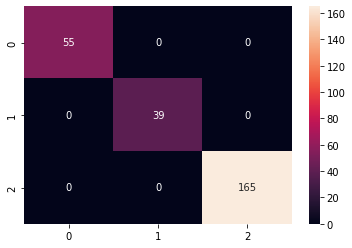

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of Logistic Regression =",accuracy_score(Y_test,Y_pred))

cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

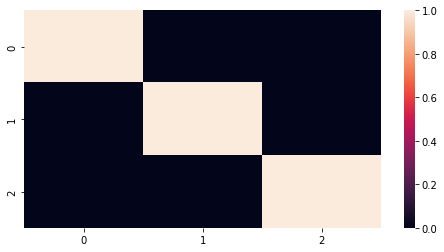

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.heatmap(conf_mat)

K Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
Y_pred = KNN.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
data_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
data_knn

,Y_test,Y_pred
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
254,2,2
255,2,2
256,2,2
257,0,2


[[ 14   4  37]
 [ 17  11  11]
 [ 10   2 153]]
Report               precision    recall  f1-score   support

           0       0.34      0.25      0.29        55
           1       0.65      0.28      0.39        39
           2       0.76      0.93      0.84       165

    accuracy                           0.69       259
   macro avg       0.58      0.49      0.51       259
weighted avg       0.65      0.69      0.65       259

Accuracy of KNN = 0.6872586872586872


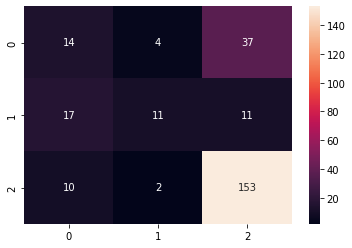

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of KNN =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

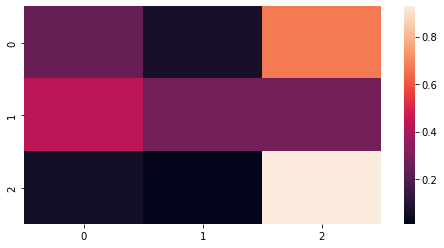

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.heatmap(conf_mat)

 Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=5)

In [ ]:
RF.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=5)

In [ ]:
Y_pred = RF.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
data_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
data_rfc

,Y_test,Y_pred
0,2,2
1,2,2
2,2,2
3,2,2
4,2,0
...,...,...
254,2,2
255,2,2
256,2,2
257,0,0


[[ 50   2   3]
 [  3  36   0]
 [  4   1 160]]
Report               precision    recall  f1-score   support

           0       0.88      0.91      0.89        55
           1       0.92      0.92      0.92        39
           2       0.98      0.97      0.98       165

    accuracy                           0.95       259
   macro avg       0.93      0.93      0.93       259
weighted avg       0.95      0.95      0.95       259

Accuracy of Random Forest = 0.9498069498069498


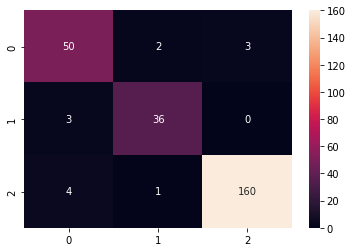

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of Random Forest =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

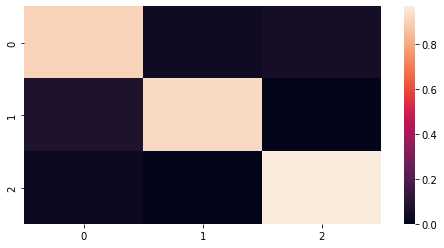

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.heatmap(conf_mat)

SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM= SVC(kernel = 'linear', random_state = 0)

In [ ]:
SVM.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [ ]:
Y_pred = SVM.predict(X_test)

In [ ]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [ ]:
data_DT = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
data_DT

,Y_test,Y_pred
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
254,2,2
255,2,2
256,2,2
257,0,0


[[ 55   0   0]
 [  0  39   0]
 [  0   0 165]]
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       165

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259

Accuracy of SVM = 1.0


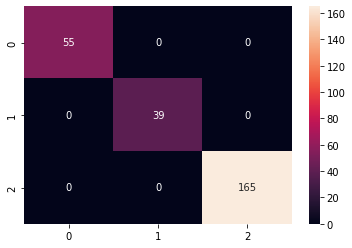

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of SVM =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

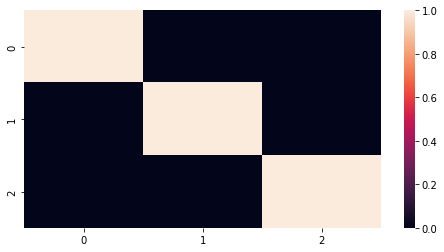

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.heatmap(conf_mat)

**5)Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
 DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
DTclassifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred=DTclassifier.predict(X_test)

In [ ]:
Y_test=Y_test.flatten()
Y_pred= Y_pred.flatten()

In [ ]:
df_DT = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_DT

,Y_test,Y_pred
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
254,2,2
255,2,2
256,2,2
257,0,0


[[ 55   0   0]
 [  0  39   0]
 [  0   0 165]]
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       165

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259

Accuracy of Decision Tree = 1.0


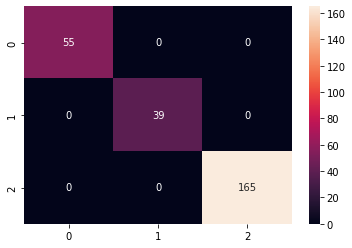

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
print("Accuracy of Decision Tree =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

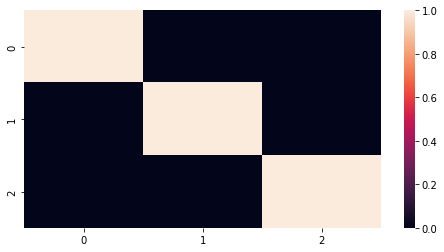

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.heatmap(conf_mat)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_test=Y_test.flatten()
Y_pred= Y_pred.flatten()

In [ ]:
data_MNB = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
data_MNB

,Y_test,Y_pred
0,2,2
1,2,2
2,2,2
3,2,2
4,2,0
...,...,...
254,2,2
255,2,2
256,2,2
257,0,2


[[ 19   0  36]
 [ 17  20   2]
 [  5   0 160]]
Report               precision    recall  f1-score   support

           0       0.46      0.35      0.40        55
           1       1.00      0.51      0.68        39
           2       0.81      0.97      0.88       165

    accuracy                           0.77       259
   macro avg       0.76      0.61      0.65       259
weighted avg       0.76      0.77      0.75       259

Accuracy of Naive Bayes = 0.7683397683397684


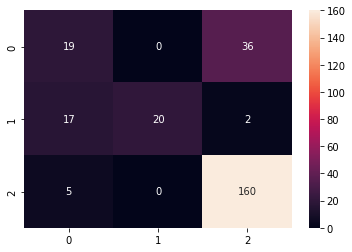

In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print("Report",classification_report(Y_test, Y_pred))
accuracy_score(Y_test,Y_pred)
print("Accuracy of Naive Bayes =",accuracy_score(Y_test,Y_pred))
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt="d")

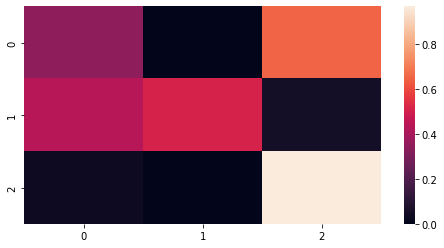

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.heatmap(conf_mat)

Text(0.5, 0.98, 'Comparision of Accuracy')

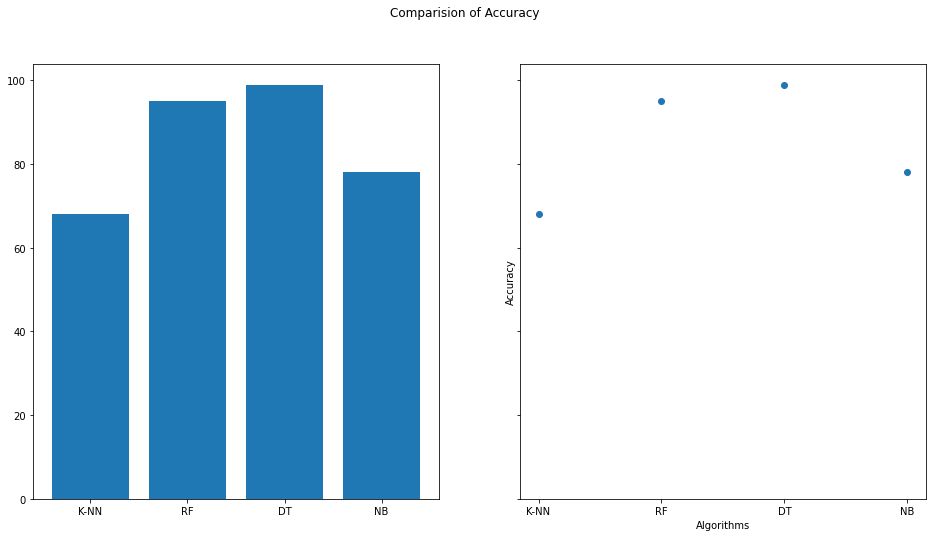

In [ ]:
import matplotlib.pyplot as plt

data = {'K-NN': 68, 'RF': 95,'DT':99,'NB': 78}

names = list(data.keys())
values = list(data.values())


fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].bar(names, values)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
axs[1].scatter(names, values)

fig.suptitle('Comparision of Accuracy')

<BarContainer object of 4 artists>

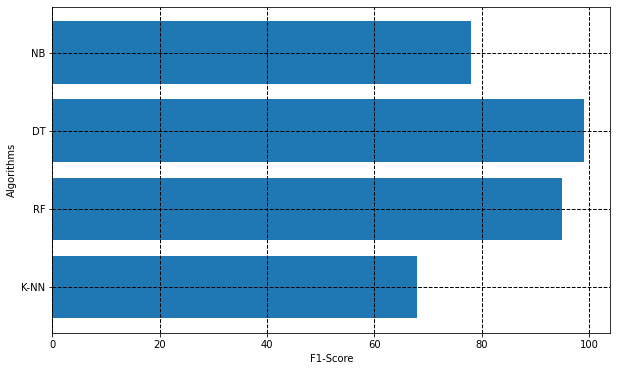

In [ ]:
data1 = {'K-NN': 68, 'RF': 95,'DT':99,'NB': 78}
names1 = list(data1.keys())
values1 = list(data1.values())
plt.subplots(figsize=(10, 6))
plt.ylabel('Algorithms')
plt.xlabel('F1-Score')


plt.grid(color='black', linestyle='dashed', linewidth=1)
plt.barh(names1, values1)

In [ ]:
print("sample input =",X_test)

sample input = [[ 1.  33.   8.  ...  2.5  1.2 63. ]
 [ 1.   6.   8.  ...  1.9  1.1 64. ]
 [ 0.   5.   2.  ...  2.3  0.1 74. ]
 ...
 [ 1.  19.   2.  ...  2.3  1.1 78. ]
 [ 0.   4.   1.  ...  1.5  0.5 68. ]
 [ 0.   4.   1.  ...  1.8  1.3 68. ]]
